# 6.4: Supervised Machine Learning

## Table of Contents

[01. Importing libraries](#01.-Importing-libraries)

[02. Importing data](#02.-Importing-data)

[03. Data prep for regression analysis](#03.-Data-prep-for-regression-analysis)

[04. Regression analysis](#04.-Regression-analysis)

[05. Bonus: performance improvement after removing outliers](#05.-Bonus:-performance-improvement-after-removing-outliers)

## 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 02. Importing data

In [2]:
# Import Divvy_trip dataset
df = pd.read_pickle( r'E:\Careerfoundry course\My Project\Generated Data\Divvy_cleaned.pkl')

In [3]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [4]:
df.head()

,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,...,to_latitude,to_longitude,to_location,year,month_start,month_end,day,hour_start,hour_end,age
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,...,41.943739,-87.664020,POINT (-87.66402 41.943739),2015,12,12,Thursday,17,17,24
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,...,41.904613,-87.640552,POINT (-87.640552 41.904613),2015,12,12,Thursday,17,17,23
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,...,41.967968,-87.650001,POINT (-87.650001 41.967968),2015,12,12,Thursday,17,17,28
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,...,41.881892,-87.648789,POINT (-87.648789 41.881892),2015,12,12,Thursday,17,17,40
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,...,41.894666,-87.638437,POINT (-87.638437 41.894666),2015,12,12,Thursday,17,17,25


In [9]:
df.to_csv(r'E:\Careerfoundry course\My Project\Generated Data\Divvy_cleaned.csv', index=False)

In [11]:
df.to_csv(r'E:\Careerfoundry course\My Project\Generated Data\Divvy_cleaned.txt', sep='\t', index=False)


## 03. Data prep for regression analysis

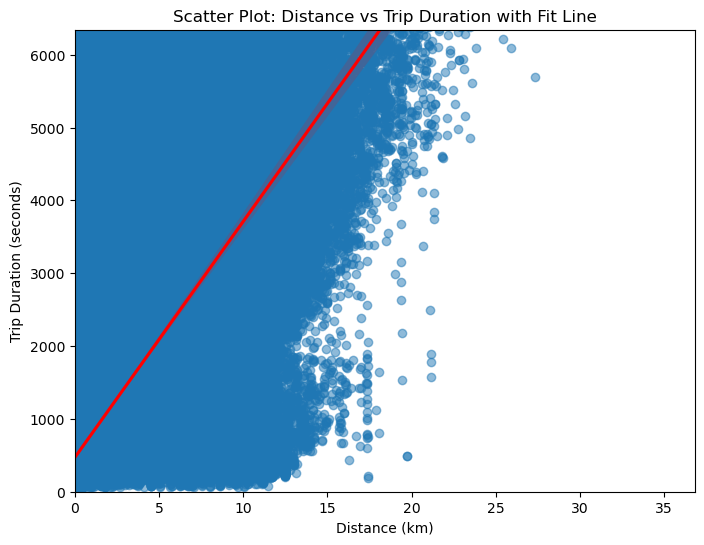

In [9]:
# Distance(between stations) vs trip duration
# Function to calculate Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Calculate distance between starting and ending stations
df['distance_km'] = haversine(df['from_latitude'], df['from_longitude'], df['to_latitude'], df['to_longitude'])

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='distance_km', y='trip_duration', data=df, scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title('Scatter Plot: Distance vs Trip Duration with Fit Line')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (seconds)')
plt.xlim(0, df['distance_km'].max())
plt.ylim(0, df['trip_duration'].quantile(0.99))  # Limiting to the 99th percentile to avoid extreme outliers
plt.show()

## Hypothesis
 ### As distance between "from station" and " to station" increases, the trip duration tends to increase.

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['distance_km'].values.reshape(-1,1)
y = df['trip_duration'].values.reshape(-1,1)

In [14]:
X

array([[0.99062837],
       [0.83802495],
       [0.40405801],
       ...,
       [4.65121554],
       [2.20276538],
       [0.79778316]])

In [15]:
y

array([[ 521],
       [ 256],
       [ 134],
       ...,
       [1246],
       [ 690],
       [ 393]], dtype=int64)

In [17]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
X_test

array([[1.77130073],
       [1.03323812],
       [3.96966577],
       ...,
       [1.17793592],
       [0.98833682],
       [0.8217346 ]])

## 04. Regression analysis

In [18]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

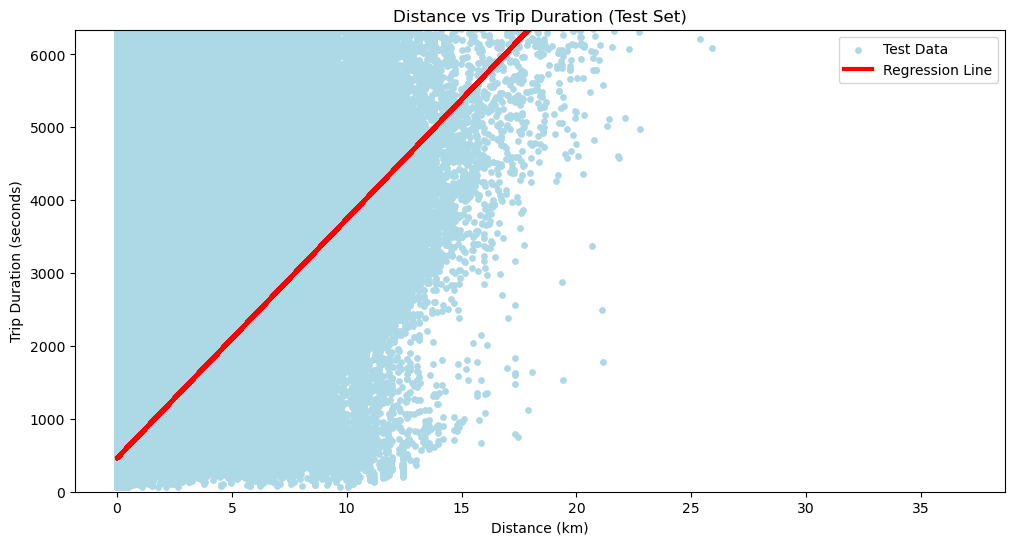

In [41]:
# Create the scatter plot for the test set
plt.figure(figsize=(12, 6))  # Set figure size for clarity
plt.scatter(X_test, y_test, color='lightblue', s=15, label='Test Data')  # Plot test data
plt.plot(X_test, y_predicted, color='red', linewidth=3, label='Regression Line')  # Plot regression line

# Add titles and labels
plt.title('Distance vs Trip Duration (Test Set)')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (seconds)')

# Apply a y-axis limit to filter out extreme outliers
plt.ylim(0, np.percentile(y_test, 99))  # Set y-axis limit to 99th percentile of Trip Duration

# Add a legend
plt.legend()

# Show the plot
plt.show()

## interpretation of scatterplot

## In the scatter plot above, we are examining the relationship between Distance (km) and Trip Duration (seconds).The red line represents the linear regression model fitted to the data.
### 1. The regression line indicates a general positive relationship between distance and trip duration,
### meaning that as trip distances between "from station" and " to station" increase, the trip duration also tends to increase, which is expected.
### 2. The plot includes trips with very long durations (outliers), and this is apparent in the vertical 
### stretching of the data points at certain distances, especially between 0 and 15 km. These trips likely
### represent unusually long trips for relatively short distances, which skew the relationship.
### 3. The regression line does not capture these outliers effectively, as they deviate significantly from 
### the main cluster of data points. This suggests that these outliers may be disproportionately influencing
### the model and reducing its accuracy.
### 4.The inclusion of extreme values makes the linear regression line flatter than it should be, as the model
### is trying to balance the influence of both normal data points and the outliers. This can lead to a poorer
### overall fit and a model that doesn't represent the core relationship well.

In [33]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[328.16073954]]
Mean squared error:  226830437.95174298
R2 score:  0.0011693850100414904


In [35]:
y_predicted

array([[1041.10020377],
       [ 798.89703085],
       [1762.51730019],
       ...,
       [ 846.38116811],
       [ 784.16218886],
       [ 729.48988049]])

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,522,1041.100204
1,255,798.897031
2,1447,1762.517300
3,736,1466.098572
4,530,1132.438887
5,1527,1531.393658
6,335,747.508512
7,751,1535.558244
8,648,755.812622
9,1467,1817.815105


In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[328.16073954]]
Mean squared error:  226843555.4827234
R2 score:  0.0012741839624943463


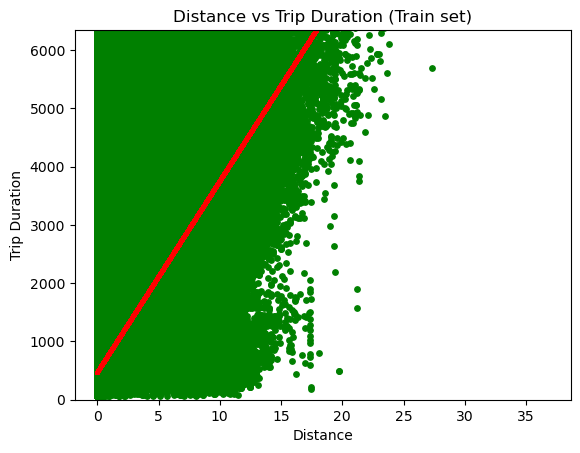

In [44]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance vs Trip Duration (Train set)')
plot_test.xlabel('Distance')
plot_test.ylabel('Trip Duration')
# Apply a y-axis limit to filter out extreme outliers
plot_test.ylim(0, np.percentile(y_test, 99))  # Set y-axis limit to 99th percentile of Trip Duration

plot_test.show()

## Reflections on the impact of possible data bias:
### The model's performance on the test set is hindered by the influence of outliers and possibly biased data. To improve the model's fit and prediction accuracy, removing extreme trip durations (like those longer than 720 minutes) is essential, along with addressing potential biases (e.g., user type, geography, time of year).For instance, casual riders might take shorter but more leisurely trips, whereas subscribers might take shorter, faster trips. Without accounting for these differences, the model might fail to capture such variations, introducing bias into the relationship between distance and duration. Geographical Bias might occur If most trips are concentrated in certain neighborhoods or city centers, this could create geographical bias. Areas with different road infrastructures, traffic, and cycling conditions might influence the duration of trips over similar distances, but the model may not reflect these regional differences. In addition, if the dataset includes trips taken during different seasons, weather conditions, or times of the day, but these factors are not controlled for, they may introduce temporal bias into the data. 
### Removing extreme trip durations (like those longer than 720 minutes) will likely result in a more reliable model, better equipped to capture the true relationship between distance and trip duration.

## 05. Bonus: performance improvement after removing outliers

In [45]:
# Remove trips with duration greater than 12 hours (720 minutes)
df_filtered = df[df['trip_duration'] <= 720]

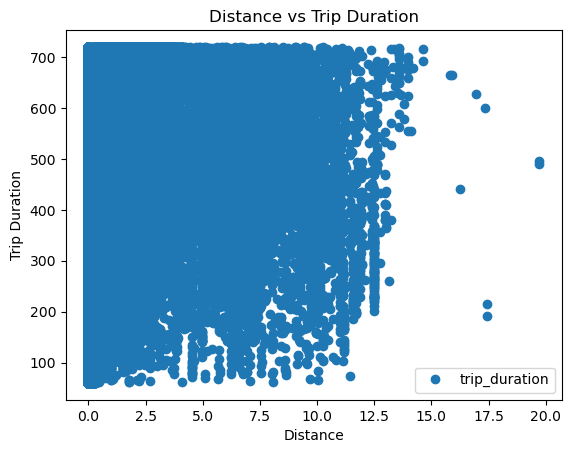

In [48]:
# See how the scatterplot looks without outliers.

df_filtered.plot(x = 'distance_km', y='trip_duration', style='o')  
plt.title('Distance vs Trip Duration')  
plt.xlabel('Distance')  
plt.ylabel('Trip Duration')  
plt.show()

In [50]:
# Reshape again.

X_2 = df_filtered['distance_km'].values.reshape(-1,1)
y_2 = df_filtered['trip_duration'].values.reshape(-1,1)

In [51]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [52]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [53]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [54]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [55]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[196.44021392]]
Mean squared error:  13072.690915154779
R2 score:  0.5061761320172793


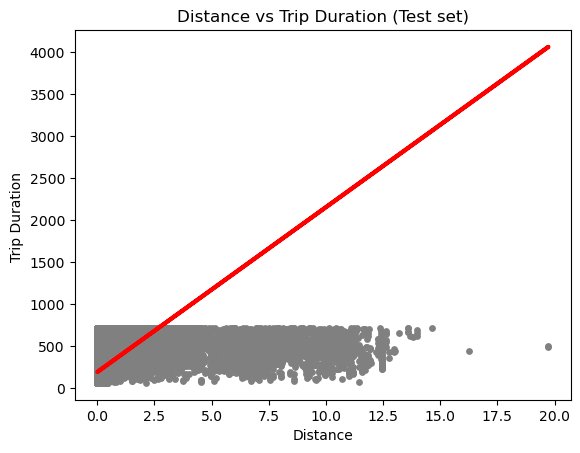

In [56]:
# Visualizing the test set results.
plot_df_filtered = plt
plot_df_filtered.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_df_filtered.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_df_filtered.title('Distance vs Trip Duration (Test set)')
plot_df_filtered.xlabel('Distance')
plot_df_filtered.ylabel('Trip Duration ')
plot_df_filtered.show()

In [57]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,481,529.405557
1,453,547.080091
2,438,392.030433
3,356,421.913045
4,435,273.603001
5,448,460.511162
6,349,323.571854
7,720,568.686152
8,425,428.775012
9,627,673.263370


In [6]:
df.head(2)

,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,...,to_latitude,to_longitude,to_location,year,month_start,month_end,day,hour_start,hour_end,age
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,...,41.943739,-87.664020,POINT (-87.66402 41.943739),2015,12,12,Thursday,17,17,24
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,...,41.904613,-87.640552,POINT (-87.640552 41.904613),2015,12,12,Thursday,17,17,23


In [ ]:
df['trip_id'].valu_counts()